# Dealing with Imbalanced Datasets
## Resampling

- A widely adopted technique for dealing with highly unbalanced datasets is called resampling. 
1. It consists of removing samples from the majority class (under-sampling) and / or
2. Adding more datapoints to the minority class (over-sampling).

<img align = 'left' src = 'IBD.jpg' style = 'width:700px; height:250px' />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

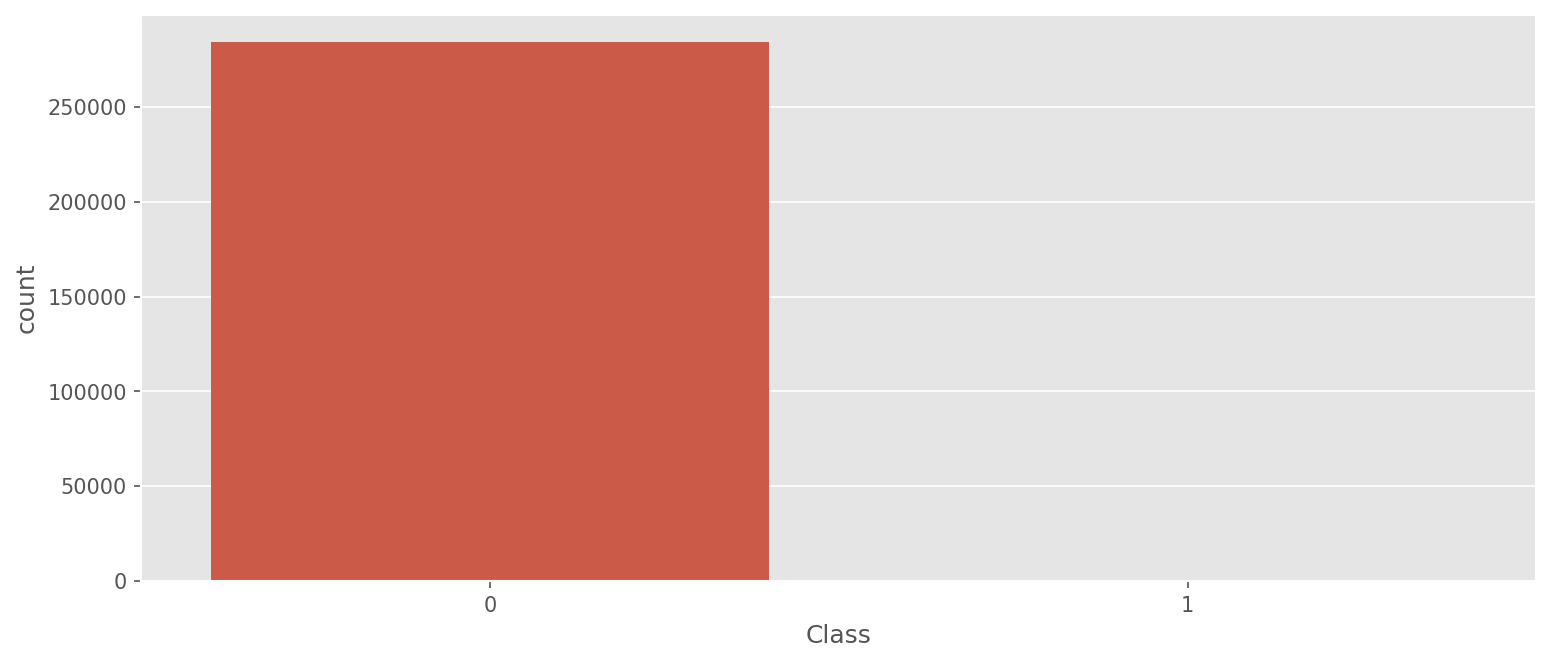

In [6]:
plt.figure(figsize=(12,5),dpi=150)
sns.countplot(df['Class'])

In [7]:
df.Class.unique()

array([0, 1], dtype=int64)

In [8]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
Class_percentage = df.Class.value_counts(normalize=True)
print('% of Non-Fradulent Transactions :',np.round(Class_percentage[0]*100,2),'%')
print('% of Fradulent Transactions :',np.round(Class_percentage[1]*100,2),'%')

% of Non-Fradulent Transactions : 99.83 %
% of Fradulent Transactions : 0.17 %


In [10]:
X = df.drop('Class',axis=1)
Y = df[['Class']]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [12]:
print('Training Data Shape:',x_train.shape)
print('Training  Shape:',x_train.shape)
print('Training Data Shape:',x_train.shape)
print('Training Data Shape:',x_train.shape)

Training Data Shape: (227845, 30)
Training  Shape: (227845, 30)
Training Data Shape: (227845, 30)
Training Data Shape: (227845, 30)


In [13]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [15]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Accuracy',accuracy_score(y_train,pred_train))
print('Testing Accuracy',accuracy_score(y_test,pred_test))

Training Accuracy 0.9988632623055147
Testing Accuracy 0.9988764439450862


In [16]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing Set f1 score  : ', f1_score(y_test, pred_test))
print()
print('Training Set precision_score : ', precision_score(y_train, pred_train))
print('Testing Set precision_score : ', precision_score(y_test,pred_test))
print()
print('Training Set recall_score    : ', recall_score(y_train, pred_train))
print('Testing Set recall_score    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.6852976913730255
Testing Set f1 score  :  0.6631578947368421

Training Set precision_score :  0.6795180722891566
Testing Set precision_score :  0.5943396226415094

Training Set recall_score    :  0.6911764705882353
Testing Set recall_score    :  0.75


# With Resampling
### 1. Undersampling

In [17]:
from imblearn.under_sampling import NearMiss
sampler = NearMiss()
x_sampled,y_sampled = sampler.fit_resample(X,Y)

In [18]:
print(x_sampled.shape)
print(y_sampled.shape)

(984, 30)
(984, 1)


In [19]:
y_sampled.value_counts()

Class
0        492
1        492
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=2)

In [21]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (787, 30)
Training Labels Shape :  (787, 1)
Testing Data Shape    :  (197, 30)
Testing Labels Shape  :  (197, 1)


In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [24]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Accuracy',accuracy_score(y_train,pred_train))
print('Testing Accuracy',accuracy_score(y_test,pred_test))

Training Accuracy 0.9593392630241423
Testing Accuracy 0.949238578680203


In [25]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing Set f1 score  : ', f1_score(y_test, pred_test))
print()
print('Training Set precision_score : ', precision_score(y_train, pred_train))
print('Testing Set precision_score : ', precision_score(y_test,pred_test))
print()
print('Training Set recall_score    : ', recall_score(y_train, pred_train))
print('Testing Set recall_score    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.9584415584415584
Testing Set f1 score  :  0.9494949494949494

Training Set precision_score :  0.9710526315789474
Testing Set precision_score :  0.9791666666666666

Training Set recall_score    :  0.9461538461538461
Testing Set recall_score    :  0.9215686274509803


# 2. Oversampling - SMOTE (Synthetic Minority Oversampling TEchnique)

In [28]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
x_sampled,y_sampled = sampler.fit_resample(X,Y)

In [29]:
print(x_sampled.shape)
print(y_sampled.shape)

(568630, 30)
(568630, 1)


In [30]:
y_sampled.value_counts()

Class
0        284315
1        284315
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=2)

In [32]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (454904, 30)
Training Labels Shape :  (454904, 1)
Testing Data Shape    :  (113726, 30)
Testing Labels Shape  :  (113726, 1)


In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [34]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Training Accuracy',accuracy_score(y_train,pred_train))
print('Testing Accuracy',accuracy_score(y_test,pred_test))

Training Accuracy 0.9738384362414927
Testing Accuracy 0.9731196032569509


In [35]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing Set f1 score  : ', f1_score(y_test, pred_test))
print()
print('Training Set precision_score : ', precision_score(y_train, pred_train))
print('Testing Set precision_score : ', precision_score(y_test,pred_test))
print()
print('Training Set recall_score    : ', recall_score(y_train, pred_train))
print('Testing Set recall_score    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.9735484544927174
Testing Set f1 score  :  0.9730321021198516

Training Set precision_score :  0.9828831982479288
Testing Set precision_score :  0.9824180130751554

Training Set recall_score    :  0.9643893524736343
Testing Set recall_score    :  0.9638238378189444
